<a href="https://colab.research.google.com/github/up3082002/DATA-SCIENCE-PROJECTS/blob/main/IRIS%20FLOWER%20PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/IRIS.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df.rename(columns={"species":"variety"},inplace = True)
df['variety'] = df['variety'].str.replace("Iris-", "", regex=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
variety         0
dtype: int64

In [ ]:
corr = df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


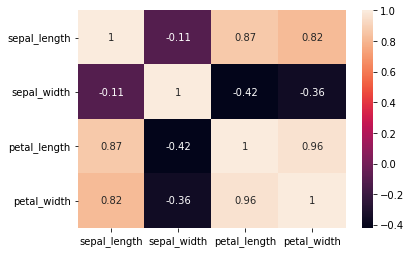

In [ ]:
sb.heatmap(corr,annot=True)

In [ ]:
df["variety"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df["variety"].nunique()

3

[Text(0.5, 1.0, 'Sepal')]

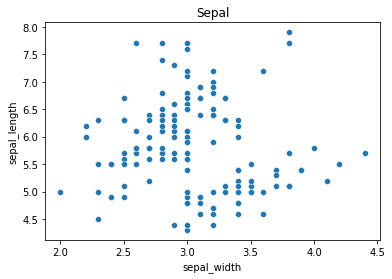

In [ ]:
sb.scatterplot(x = "sepal_width", y = "sepal_length", data = df).set(title='Sepal')

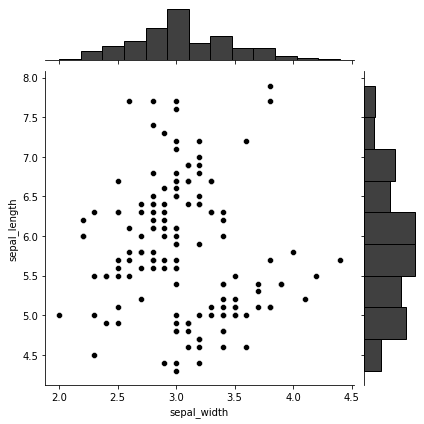

In [ ]:
sb.jointplot(data=df, x="sepal_width", y="sepal_length",color = "black")

[Text(0.5, 1.0, 'Sepal')]

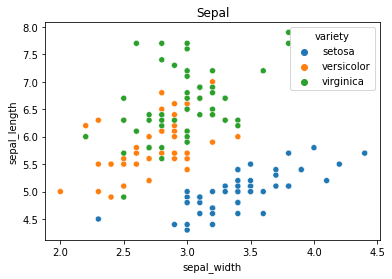

In [ ]:
sb.scatterplot(x = "sepal_width", y = "sepal_length", hue="variety",data = df).set(title='Sepal')

In [ ]:
df["variety"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: variety, dtype: int64

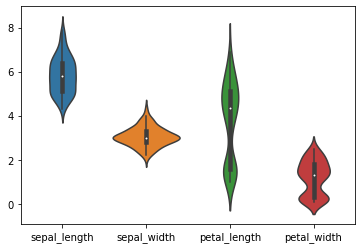

In [ ]:
sb.violinplot(data=df)

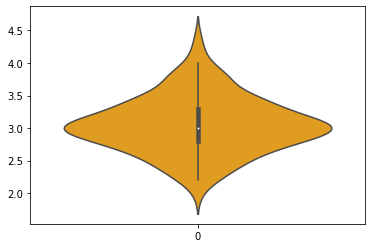

In [ ]:
sb.violinplot(data=df["sepal_width"], color = "orange")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


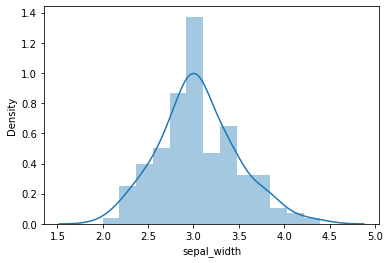

In [ ]:
sb.distplot(df["sepal_width"])

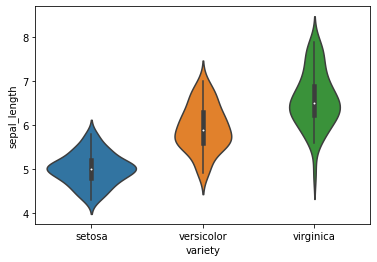

In [ ]:
sb.violinplot(x = "variety", y = "sepal_length" , data = df)

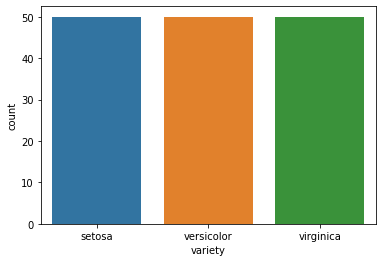

In [ ]:
sb.countplot(x = "variety",data = df)

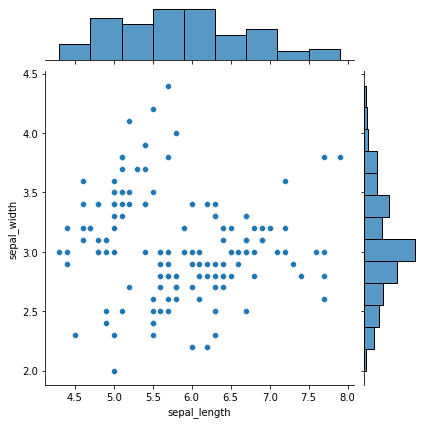

In [ ]:
sb.jointplot(data=df, x="sepal_length", y="sepal_width") 

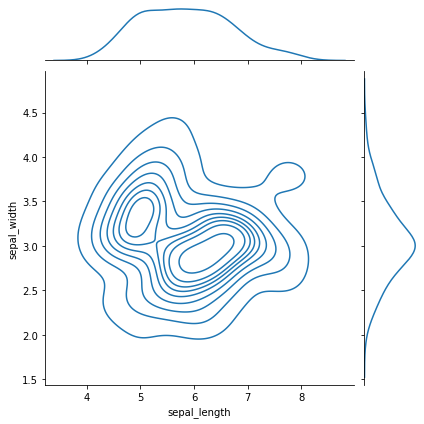

In [ ]:
sb.jointplot(data=df, x="sepal_length", y="sepal_width",kind = "kde")

[Text(0.5, 1.0, 'petal')]

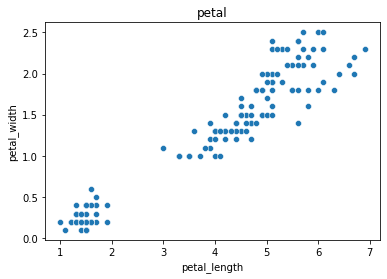

In [ ]:
sb.scatterplot(x = "petal_length", y = "petal_width", data = df).set(title='petal')

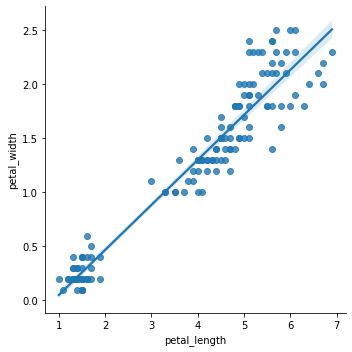

In [ ]:
sb.lmplot(x="petal_length", y="petal_width", data=df)

In [ ]:
df["petal_length"].corr(df["petal_width"])

0.9627570970509663

In [ ]:
df['total_length'] = df["petal_length"] + df["sepal_length"]
df

,sepal_length,sepal_width,petal_length,petal_width,variety,total_length
0,5.1,3.5,1.4,0.2,setosa,6.5
1,4.9,3.0,1.4,0.2,setosa,6.3
2,4.7,3.2,1.3,0.2,setosa,6.0
3,4.6,3.1,1.5,0.2,setosa,6.1
4,5.0,3.6,1.4,0.2,setosa,6.4
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,11.9
146,6.3,2.5,5.0,1.9,virginica,11.3
147,6.5,3.0,5.2,2.0,virginica,11.7
148,6.2,3.4,5.4,2.3,virginica,11.6


In [ ]:
df['total_length'].mean()

9.602000000000004

In [ ]:
df['total_length'].std()

2.5191739884121978

In [ ]:
df['sepal_length'].max()

7.9

In [ ]:
df[ (df["sepal_length"] > 5.5) & (df["variety"] == "setosa") ].sort_values("sepal_length",axis = 0,ascending = False)

,sepal_length,sepal_width,petal_length,petal_width,variety,total_length
14,5.8,4.0,1.2,0.2,setosa,7.0
15,5.7,4.4,1.5,0.4,setosa,7.2
18,5.7,3.8,1.7,0.3,setosa,7.4


In [ ]:
df.loc[ (df["petal_length"] < 5) & (df["variety"] == "virginica") ,["sepal_length","sepal_width"]]

,sepal_length,sepal_width
106,4.9,2.5
121,5.6,2.8
123,6.3,2.7
126,6.2,2.8
127,6.1,3.0
138,6.0,3.0


In [ ]:
df.groupby("variety").mean()

,sepal_length,sepal_width,petal_length,petal_width,total_length
variety,,,,,
setosa,5.006,3.418,1.464,0.244,6.470
versicolor,5.936,2.770,4.260,1.326,10.196
virginica,6.588,2.974,5.552,2.026,12.140


In [ ]:
df.groupby("variety").agg({
    'petal_length':'std'
})

,petal_length
variety,
setosa,0.173511
versicolor,0.469911
virginica,0.551895


In [ ]:
df['total_width'] = df["sepal_width"] + df["petal_width"]
df

,sepal_length,sepal_width,petal_length,petal_width,variety,total_length,total_width
0,5.1,3.5,1.4,0.2,setosa,6.5,3.7
1,4.9,3.0,1.4,0.2,setosa,6.3,3.2
2,4.7,3.2,1.3,0.2,setosa,6.0,3.4
3,4.6,3.1,1.5,0.2,setosa,6.1,3.3
4,5.0,3.6,1.4,0.2,setosa,6.4,3.8
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,11.9,5.3
146,6.3,2.5,5.0,1.9,virginica,11.3,4.4
147,6.5,3.0,5.2,2.0,virginica,11.7,5.0
148,6.2,3.4,5.4,2.3,virginica,11.6,5.7


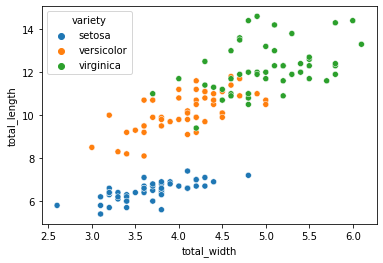

In [ ]:
sb.scatterplot(x = "total_width", y = "total_length",hue = "variety" ,data = df)

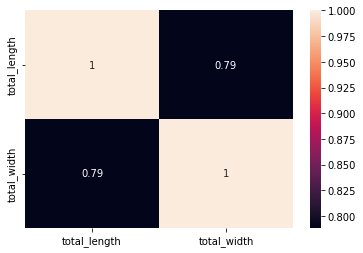

In [ ]:
total_corr = df[["total_length","total_width"]].corr()
sb.heatmap(total_corr,annot = True)

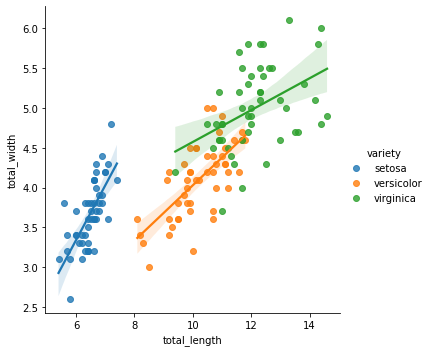

In [ ]:
sb.lmplot(x="total_length", y="total_width", hue = "variety" ,data=df)

In [ ]:
df_virginica = df[(df["variety"] == "virginica")]
Q1 = df_virginica.total_width.quantile(0.25) 
Q2 = df_virginica.total_width.quantile(0.5) 
Q3 = df_virginica.total_width.quantile(0.75)
Q4 = df_virginica.total_width.quantile(1)
IQR = Q3 - Q1
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR


KeyError: ignored

In [ ]:
outliers_df = df_virginica[(df_virginica["total_width"] < alt_sinir) | (df_virginica["total_width"] > ust_sinir)]
outliers_df

NameError: ignored

In [ ]:
print(alt_sinir)
print(df_virginica["total_width"].min())

3.5
3.7


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


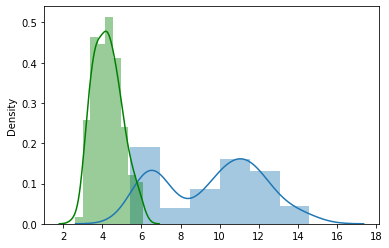

In [ ]:
sb.distplot(x=df['total_length'])
sb.distplot(x=df['total_width'],color = "green")

In [ ]:
X = df[["total_length","total_width"]]
y = df["variety"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)


In [ ]:
model = decision_tree.fit(X_train , y_train)

In [ ]:
predicts = model.predict(X_test)
accuracy_score(y_test,predicts)

0.86

In [ ]:
model.predict([[6.4,3.8]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['setosa'], dtype=object)